# Optimal Speed and Optimal Hedging

First I propose to solve a deterministic problem with the same parameters. I will help up to:
(1) Compare the results from deterministic to scochatic settings
(2) Set the grid and boundaries for parameters in the stochastic setting
(3) Provide starting points for the optimization

### Running Deterministic Optimization

In [1]:
import pandas as pd
from scipy.interpolate import interp1d
from Logistics_stoch import CShip
from Logistics_stoch import CRoundtrip
from Logistics_stoch import CJourney
from Logistics_stoch import CPort
import deterministic_opt_func as det_opt

oJourney = CJourney(NrOfRoundtrips = 1,
                    LegsPerRoundtrip = 5,
                    OpprtCostCapitalRate = 0.08,
                    DailyHire_USDperDay = 30000,
                    FutureProfitPotential_USDperDay = 12968)


oShip = CShip(Vmin=10, 
              Vmax=17, 
              DWTscantling=157880, 
              DWTdesign=145900, 
              Lightweight=49000, 
              k=0.00000391, 
              p=381, 
              g=3.1, 
              a=0.666667, 
              ShipDischargeRate=3000, 
              BallastCapacity=54500,
              MinFillRateShip=0.3,
              AuxFuelConsumption_TonnePerDay=5)

oPortList = []

df_data = pd.read_excel('journey_data.xlsx',sheet_name='Ports')
for i in range(0,oJourney.LegsPerRoundtrip+1):
    for index,row in df_data.iterrows():
        v_name = row['Variable']
        v_value = row[i]
        #print("Loading from excel, leg:"+str(i)+", Executing statement("+str(v_name)+"="+str(v_value)+")")
        exec(v_name + '=' + str(v_value))
    
    
    
    oPort = CPort(PortNr=i, 
                  DistancePreviousPort_nm=DistancePreviousPort_nm,
                  LoadingRate_QbmetresperHr=LoadingRate_QbmetresperHr,
                  WaitingTime_Hrs=WaitingTime_Hrs,              
                  CargoIntake_Barrels=CargoIntake_Barrels,
                  CargoIntake_QBmetresperBarrel=CargoIntake_QBmetresperBarrel,
                  CargoIntake_QbmetresPerTonne=CargoIntake_QbmetresPerTonne,
                  FixedPortAccessCosts_USD = FixedPortAccessCosts_USD,
                  UnloadingCharge_USDperHr = UnloadingCharge_USDperHr,
                  LoadingCharge_USDperHr = LoadingCharge_USDperHr,
                  CargoRevenueRate_USDperBarrelper1000nm = CargoRevenueRate_USDperBarrelper1000nm,
                  MainBunkerRate_USDperBarrel = MainBunkerRate_USDperBarrel,
                  MainBunker_QBmetresperBarrel = MainBunker_QBmetresperBarrel,
                  MainBunker_QbmetresPerTonne = MainBunker_QbmetresPerTonne,
                  AuxFuelRate_USDperTonne = AuxFuelRate_USDperTonne,
                  UnloadingCosts_USD = UnloadingCosts_USD,
                  LoadingCosts_USD = LoadingCosts_USD,
                  CargoIntake_Tonne = CargoIntake_Tonne,
                  UnloadingTime_Hrs = UnloadingTime_Hrs,
                  LoadingTime_Hrs = LoadingTime_Hrs,
                  LegRevenue_Barrels = LegRevenue_Barrels,
                  LegRevenue_USD = LegRevenue_USD)
    
    oPortList.append(oPort)

oRTList_det = det_opt.run_deterministic_opt(oJ=oJourney,
                                            oS=oShip,
                                            oPL=oPortList)
# storing solution in the journey object
oJourney.oRTList_det = oRTList_det


********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1000000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:59166500.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:846743.2257190181
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:60922236.42273887
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:853233.9234722476
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:62666150.727873124
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!

In [2]:
df_data

Parameter     Units        Section  \
0          Distance from previous port        nm            Leg   
1                  Cargo loading rate   m^3/hour            Leg   
2   Waiting time (queueing + berthing)       hrs            Leg   
3               Cargo intake (barrels)   barrels        Demand    
4                           m^3/barrel       NaN        Demand    
5                  Density (m^3/tonne)       NaN        Demand    
6               Per barrel per 1000 nm       USD        Revenue   
7              Fixed Port Access Costs       USD  Harbour Costs   
8             Unloading charge (/hour)       USD  Harbour Costs   
9               Loading charge (/hour)       USD  Harbour Costs   
10               Main bunker (/barrel)       USD          Fuel    
11            Main bunker m^3 / barrel       NaN          Fuel    
12    Main bunker Density (M^3./tonne)       NaN          Fuel    
13             Auxiliary fuel (/tonne)       USD          Fuel    
14                     Unloading costs       USD           Cost   
15                       Loading costs       USD           Cost   
16                Cargo intake (tonne)     tonne           Cost   
17                      Unloading time       hrs           Cost   
18                        Loading time       hrs           Cost   
19                 Leg revenues (/leg)   Barrels        Revenue   
20                 Leg revenues (/leg)   Barrels            USD   

                                  Variable               0             1  \
0                  DistancePreviousPort_nm        0.000000  8.293000e+03   
1                LoadingRate_QbmetresperHr     3000.000000  3.000000e+03   
2                          WaitingTime_Hrs       24.000000  2.400000e+01   
3                      CargoIntake_Barrels  1000000.000000  1.200000e+06   
4            CargoIntake_QBmetresperBarrel        0.136000  1.360000e-01   
5             CargoIntake_QbmetresPerTonne        1.070000  1.070000e+00   
6   CargoRevenueRate_USDperBarrelper1000nm        0.500000  4.500000e-01   
7                 FixedPortAccessCosts_USD   300000.000000  3.000000e+05   
8                 UnloadingCharge_USDperHr        0.000000  4.000000e+03   
9                   LoadingCharge_USDperHr     4000.000000  4.000000e+03   
10             MainBunkerRate_USDperBarrel       63.000000  6.300000e+01   
11            MainBunker_QBmetresperBarrel        0.136000  1.360000e-01   
12             MainBunker_QbmetresPerTonne        1.070000  1.070000e+00   
13                 AuxFuelRate_USDperTonne      590.000000  5.900000e+02   
14                      UnloadingCosts_USD        0.000000  1.813333e+05   
15                        LoadingCosts_USD   181333.333333  2.176000e+05   
16                       CargoIntake_Tonne   127102.803738  1.525234e+05   
17                       UnloadingTime_Hrs        0.000000  4.533333e+01   
18                         LoadingTime_Hrs       45.333333  5.440000e+01   
19                      LegRevenue_Barrels        0.000000  2.487900e+04   
20                          LegRevenue_USD        0.000000  1.243950e+04   

               2             3             4             5             6   7  \
0   8.293000e+03  8.293000e+03  8.293000e+03  8.293000e+03  8.293000e+03 NaN   
1   3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03 NaN   
2   2.400000e+01  2.400000e+01  2.400000e+01  2.400000e+01  2.400000e+01 NaN   
3   1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06 NaN   
4   1.360000e-01  1.360000e-01  1.360000e-01  1.360000e-01  1.360000e-01 NaN   
5   1.070000e+00  1.070000e+00  1.070000e+00  1.070000e+00  1.070000e+00 NaN   
6   4.500000e-01  4.500000e-01  4.500000e-01  4.500000e-01  4.500000e-01 NaN   
7   3.000000e+05  3.000000e+05  3.000000e+05  3.000000e+05  3.000000e+05 NaN   
8   4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03 NaN   
9   4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03 NaN   
1

# Set up the freight rate dynamics
We assume that the log of the spot freight rate has the Ornstein-Uhlenbeck (OU) dynamics:

$dR_t = \lambda_r (R_t - \bar{R}) dt + \sigma_r dW_t$

The solution of the OU process is well know, the random variable is normally distributed with the following mean and variance:

$\mathbb{E}(R_T|R_0) = R_0 e^{-\lambda_r T} + \bar{R} (1 - e^{-\lambda_r T})$

$Var(R_T|R_0) = \frac{{\sigma_r}^2}{2 \lambda_r}(1 - e^{-2\lambda_r T})$

To get to the actual freight rate:

$\mathbb{E} [exp(R_T)] = e^{\mathbb{E}(R_T|R_0) + 0.5*Var(R_T|R_0)} = e^{R_0 e^{-\lambda_r T} + \bar{R} (1 - e^{-\lambda_r T}) + \frac{{\sigma_r}^2}{4 \lambda_r}(1 - e^{-2\lambda_r T})}$

$Var[exp(R_T)] = (e^{Var(R_T|R_0)}-1) e^{2\mathbb{E}(R_T|R_0) + Var(R_T|R_0)} = (e^{\frac{{\sigma_r}^2}{4 \lambda_r}(1 - e^{-2\lambda_r T})}-1) e^{2(R_0 e^{-\lambda_r T} + \bar{R} (1 - e^{-\lambda_r T})) + \frac{{\sigma_r}^2}{4 \lambda_r}(1 - e^{-2\lambda_r T})}$


In [3]:
# O.U. parameters of the log rate model:
# the data is assuming T=1 it is one year.

import matplotlib.pyplot as plt
import OU_process

ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3)


T_days=15
r = 6.27
states, step = ou_process.gen_states(T_days=T_days)
print('All generated states for T_days=' + str(T_days))
print(states)
p = ou_process.p_vector(states, step, r, T_days=T_days)

plt.xlabel('States')
plt.title('Probability as a function of state in T_days')
plt.plot(states, p)
plt.show()

All generated states for T_days=15
[6.01755091 6.02373562 6.02992034 6.03610505 6.04228977 6.04847448
 6.0546592  6.06084391 6.06702863 6.07321334 6.07939806 6.08558277
 6.09176749 6.0979522  6.10413692 6.11032163 6.11650635 6.12269106
 6.12887578 6.13506049 6.14124521 6.14742992 6.15361464 6.15979935
 6.16598407 6.17216878 6.1783535  6.18453821 6.19072293 6.19690764
 6.20309236 6.20927707 6.21546179 6.2216465  6.22783122 6.23401593
 6.24020065 6.24638536 6.25257008 6.25875479 6.26493951 6.27112422
 6.27730894 6.28349365 6.28967837 6.29586308 6.3020478  6.30823251
 6.31441723 6.32060194 6.32678666 6.33297137 6.33915609 6.3453408
 6.35152552 6.35771023 6.36389495 6.37007966 6.37626438 6.38244909]


## Forward Freight Agreements

We assume that the futures curve is trading at a certain discount to the expected spot rate given by the O.U. process. If the spot rate is below its long term average, the expectation curve will look like a contango, and for a spot rate above the long term rate, the expectation curve will look like a backwardation. On both of these curves we apply a discount which is governed by a slope contant (fut_curve_slope in the code):

$F_T = e^{-slope * T} \mathbb{E}(e^{R_T}|R_t)$

In [4]:
import numpy as np
import FFA
ffa = FFA.FFA(fut_curve_slope = -0.01)

r0 = ou_process.r_bar * 1.1
T_hor = np.array(range(0,365))
futures_curve = []
expecation_curve= []
for t in T_hor:
    E_R = ou_process.E_exp(r0=r0,T_days=t)
    futures_curve.append(ffa.shipping_futures(E_R=E_R,T_days=t))
    expecation_curve.append(E_R)
    
plt.plot(futures_curve,label='Futures')
plt.plot(expecation_curve, label='Model')
plt.plot(np.exp(ou_process.generate_path(r=r0,T_days=365)), label='Simulated Path')
plt.xlabel("Time in days")
plt.ylabel("Price in US$")
plt.title("Futures curve at t=0 vs the model future realization")
if r0<ou_process.r_bar:
    plt.legend(loc="lower right")
else:
    plt.legend(loc="upper right")
plt.show()

## Running the stochastic optimization

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


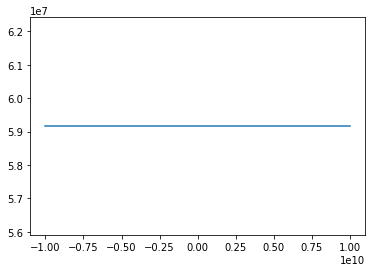

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0A0624F8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

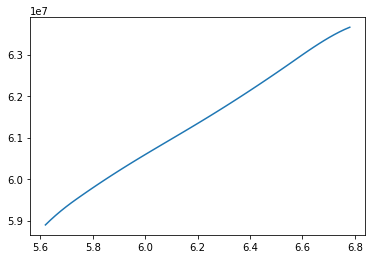

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B1189A8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

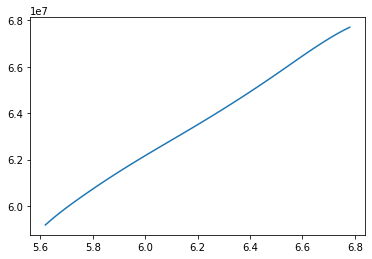

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B143C78>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

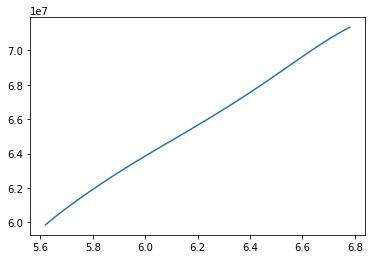

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B153D68>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

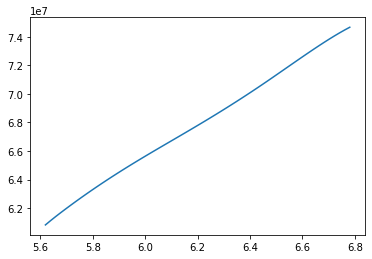

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0A04F2C8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

In [5]:
from Optimization_Problem import Optimization_Problem
op0 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.01), 
                          eta=0.000001) # determines how important is the variance of future spot rates)
oRTList0 = op0.run_optimization()

# Display the results



## Value Function ($G$) or Goodwill 

The final value function after all legs and rountrip were calculated from the back.

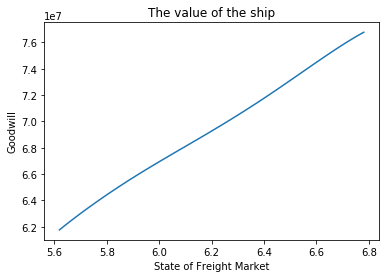

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

plt.plot(oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.x,
         oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.y)
plt.xlabel('State of Freight Market') 
plt.ylabel('Goodwill') 
plt.title('The value of the ship')
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.show()



## Hedge Ratio

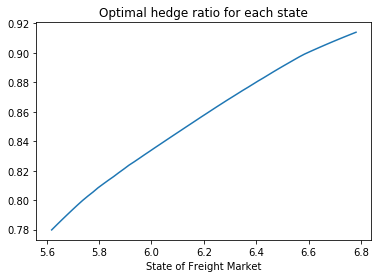

In [7]:
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y)
plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.show()

## Time of trip

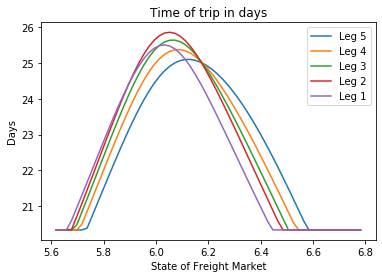

In [8]:
plt.plot(oRTList0[1].oLegList[4].TimeAtSea_Days.x,
         oRTList0[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5')
plt.plot(oRTList0[1].oLegList[3].TimeAtSea_Days.x,
         oRTList0[1].oLegList[3].TimeAtSea_Days.y, 
         label='Leg 4')
plt.plot(oRTList0[1].oLegList[2].TimeAtSea_Days.x,
         oRTList0[1].oLegList[2].TimeAtSea_Days.y, 
         label='Leg 3')
plt.plot(oRTList0[1].oLegList[1].TimeAtSea_Days.x,
         oRTList0[1].oLegList[1].TimeAtSea_Days.y, 
         label='Leg 2')
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 1')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()





## Speed trip

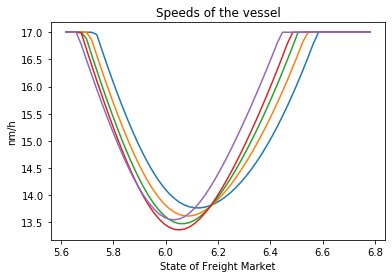

In [9]:
plt.plot(oRTList0[1].oLegList[4].Speed_kn.x,
         oRTList0[1].oLegList[4].Speed_kn.y, 
         label='Leg 5')
plt.plot(oRTList0[1].oLegList[3].Speed_kn.x,
         oRTList0[1].oLegList[3].Speed_kn.y, 
         label='Leg 4')
plt.plot(oRTList0[1].oLegList[2].Speed_kn.x,
         oRTList0[1].oLegList[2].Speed_kn.y, 
         label='Leg 3')
plt.plot(oRTList0[1].oLegList[1].Speed_kn.x,
         oRTList0[1].oLegList[1].Speed_kn.y, 
         label='Leg 2')
plt.plot(oRTList0[1].oLegList[0].Speed_kn.x,
         oRTList0[1].oLegList[0].Speed_kn.y, 
         label='Leg 1')
plt.xlabel('State of Freight Market') 
plt.ylabel('nm/h') 
plt.title('Speeds of the vessel')
plt.show()


## Changing parameters of the problem:

Assume that the forward rates are discounted by more than previously assumed, in this case hadging is more costly on average, we expect less hedging and decrease of the hedge ratio:

> ffa = FFA.FFA(fut_curve_slope = -0.01)

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


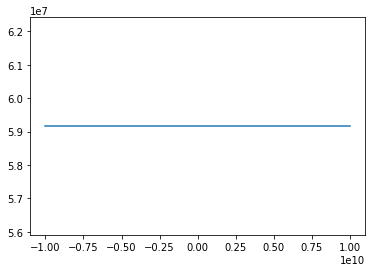

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B46CB38>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

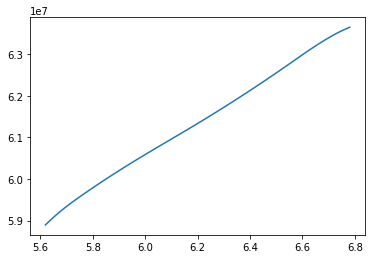

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0A055A48>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B3A6D68>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

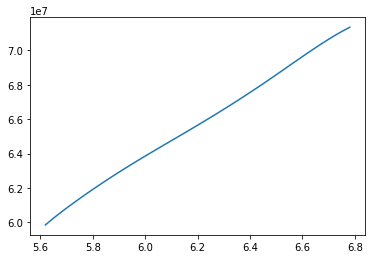

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B4F3868>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

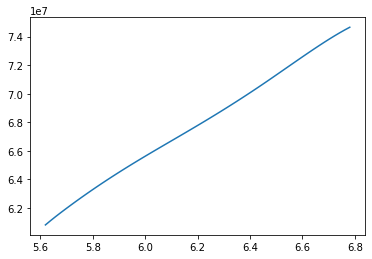

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B125048>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

In [11]:
from Optimization_Problem import Optimization_Problem
op1 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.000001) # determines how important is the variance of future spot rates)
oRTList1 = op1.run_optimization()

## Comparison of hedge ratios

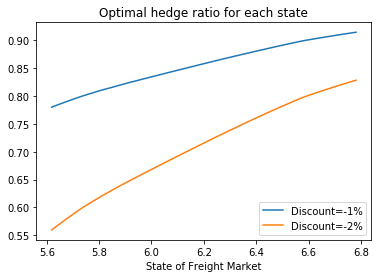

In [12]:
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1%')
plt.plot(oRTList1[1].oLegList[4].Hedge_Ratio.x,
         oRTList1[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2%')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

## Comparison of time of journeys of the last leg

In [13]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1%')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2%')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## More importance to the volatility of the spot rates 
>eta=0.000001

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


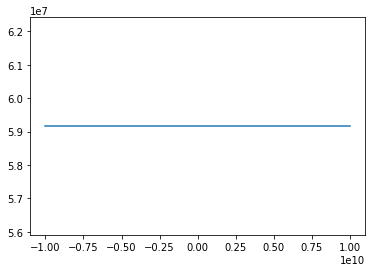

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B2BED18>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

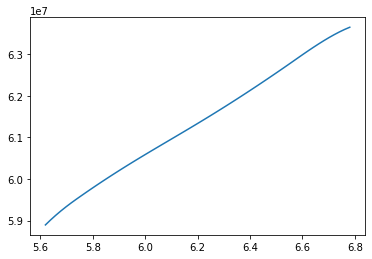

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B06B0E8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B1927C8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B11B818>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B2DE868>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

In [14]:
op2 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.0000015) 
oRTList2 = op2.run_optimization()

In [15]:
plt.plot(oRTList[1].oLegList[4].Hedge_Ratio.x,
         oRTList[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=1e-6')
plt.plot(oRTList2[1].oLegList[4].Hedge_Ratio.x,
         oRTList2[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1e-6')
plt.plot(oRTList3[1].oLegList[4].Hedge_Ratio.x,
         oRTList3[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

NameError: name 'oRTList' is not defined

In [ ]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1% eta=1e-6')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1e-6')
plt.plot(oRTList2[1].oLegList[0].TimeAtSea_Days.x,
         oRTList2[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## Changing paramters of the OU process

> ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3)


********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


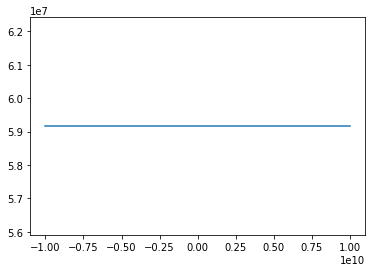

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B2590E8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

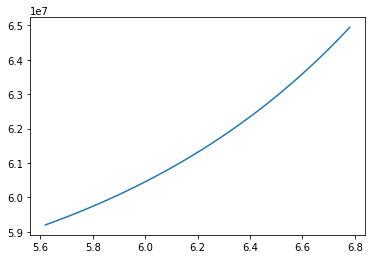

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B1C05E8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B0C1278>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B3C8F48>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B43D138>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

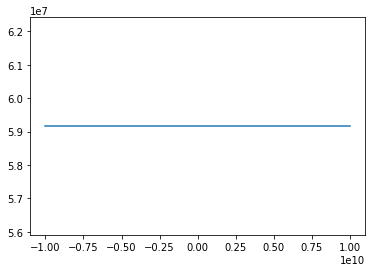

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B318868>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B5165E8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

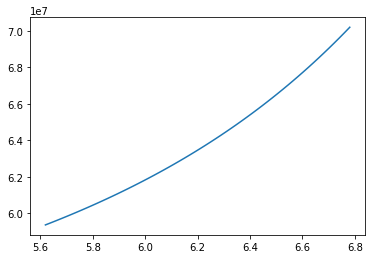

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B56EC28>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

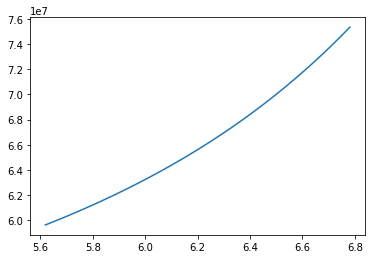

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B4B16D8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

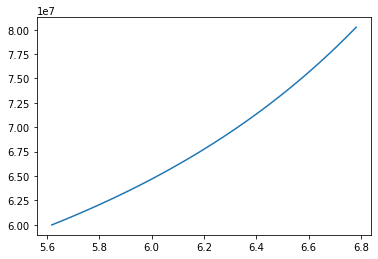

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x000001EF0B4689F8>
Running optimization for state: 5.618822629199312
Running optimization for state: 5.638523557023064
Running optimization for state: 5.658224484846817
Running optimization for state: 5.677925412670568
Running optimization for state: 5.69762634049432
Running optimization for state: 5.717327268318073
Running optimization for state: 5.737028196141825
Running optimization for state: 5.756729123965577
Running optimization for state: 5.776430051789329
Running optimization for state: 5.796130979613081
Running optimization for state: 5.815831907436833
Running optimization for state: 5.835532835260586
Running optimization for state: 5.855233763084338
Running optimization for state: 5.8749346909080895
Running optimization for state: 5.894635618731842
Running optimization for state: 5.914336546555594
Running optimization for state: 5.9340374743793465
Running optimization for state: 5.953738402203099
Running optimi

In [18]:
op3 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.5, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.01), 
                          eta=0.000001) 
oRTList3 = op3.run_optimization()

op4 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.8, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.01), 
                          eta=0.000001) 
oRTList4 = op4.run_optimization()

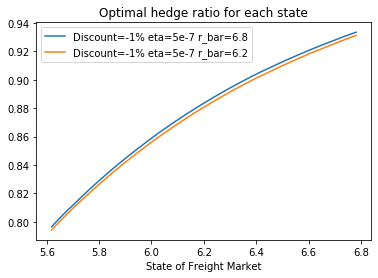

In [19]:
plt.plot(oRTList3[1].oLegList[4].Hedge_Ratio.x,
         oRTList3[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.8')
plt.plot(oRTList4[1].oLegList[4].Hedge_Ratio.x,
         oRTList4[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.2')


plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='upper left')
plt.show()

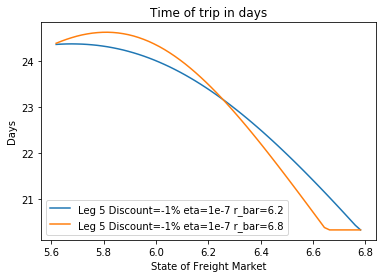

In [20]:
plt.plot(oRTList3[1].oLegList[0].TimeAtSea_Days.x,
         oRTList3[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.2')
plt.plot(oRTList4[1].oLegList[0].TimeAtSea_Days.x,
         oRTList4[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.8')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='lower left')
plt.title('Time of trip in days')
plt.show()